📊 R² por fold: [0.972 0.976 0.974 0.972 0.977]
📈 Média: 0.974 ± 0.002


C:\Users\rodzm\AppData\Local\Temp\ipykernel_6724\1595481504.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=importances.index, palette="Blues_r")


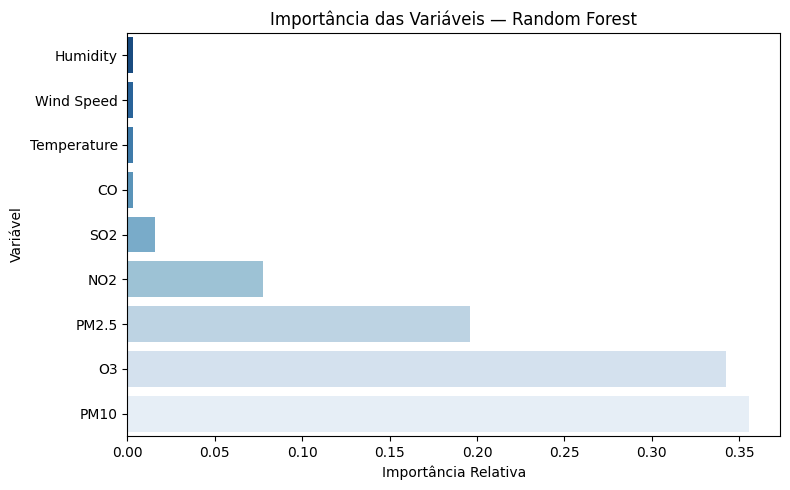

In [3]:
# ---------------------------------------------------------
# Validação e Storytelling
# ---------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv("../data/processed/air_quality_clean.csv")

X = df[["Temperature","Humidity","Wind Speed","PM2.5","PM10","NO2","SO2","CO","O3"]]
y = df["Pollution_Index"]

model = RandomForestRegressor(n_estimators=200, random_state=42)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model, X, y, cv=cv, scoring="r2")
print(f"📊 R² por fold: {np.round(scores,3)}")
print(f"📈 Média: {scores.mean():.3f} ± {scores.std():.3f}")

# Importância das variáveis
model.fit(X, y)
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=True)

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=importances.index, palette="Blues_r")
plt.title("Importância das Variáveis — Random Forest")
plt.xlabel("Importância Relativa")
plt.ylabel("Variável")
plt.tight_layout()
plt.show()
